<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793672/blob/main/ActividadSemanal6_Visualizacion_A01793672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CIENCIA Y ANALITICA DE DATOS**
---
#**Actividad Semanal 6 - Visualizacion**
---
##**Alumno: Freddy Armendariz Herrera**
##**Matrícula: A01793672**
---
###**Profesor Titular:** Maria de la Paz Rico Fernandez

###**Profesor Tutor:** Juan Miguel Meza Méndez

###**Fecha:** 1 de Noviembre del 2022

---

In [173]:
# Modulos, Librerias y Paquetes

# Tratamiento de datos
# ==============================
import numpy as np
import pandas as pd

# Graficos
# ==============================
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocesado
# ==============================
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

---
##**1. Cargar los datos**

In [174]:
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(url)

---
##**2. Informacion del dataframe**

In [175]:
df.shape #Se verifican dimensiones del dataframe

(30000, 25)

In [176]:
df.columns #Se verifican los nombres actuales de las columnas del dataframe

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [177]:
df.head() #Se despliegan los primeros 5 datos

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [178]:
#Se reemplazan los nombres de las columnas

df = df.rename(columns = {'X1' : 'Amount_Credit', 
                          'X2' : 'Gender',
                          'X3' : 'Education',
                          'X4' : 'Marital_Status',
                          'X5' : 'Age',
                          'X6' : 'Payment_Sep_2005',
                          'X7' : 'Payment_Aug_2005',
                          'X8' : 'Payment_Jul_2005',
                          'X9' : 'Payment_Jun_2005',
                          'X10' : 'Payment_May_2005',
                          'X11' : 'Payment_Apr_2005',
                          'X12' : 'Bill_State_Sep_2005',
                          'X13' : 'Bill_State_Aug_2005',
                          'X14' : 'Bill_State_Jul_2005',
                          'X15' : 'Bill_State_Jun_2005',
                          'X16' : 'Bill_State_May_2005',
                          'X17' : 'Bill_State_Apr_2005',
                          'X18' : 'Previous_Pay_Sep_2005',
                          'X19' : 'Previous_Pay_Aug_2005',
                          'X20' : 'Previous_Pay_Jul_2005',
                          'X21' : 'Previous_Pay_Jun_2005',
                          'X22' : 'Previous_Pay_May_2005',
                          'X23' : 'Previous_Pay_Apr_2005' }, 
               inplace = False
               )

In [179]:
df.head() #Se vuelven a desplegar los primeros 5 valores del dataframe

,ID,Amount_Credit,Gender,Education,Marital_Status,Age,Payment_Sep_2005,Payment_Aug_2005,Payment_Jul_2005,Payment_Jun_2005,...,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [180]:
df.dtypes

ID                         int64
Amount_Credit              int64
Gender                   float64
Education                float64
Marital_Status           float64
Age                      float64
Payment_Sep_2005         float64
Payment_Aug_2005         float64
Payment_Jul_2005         float64
Payment_Jun_2005         float64
Payment_May_2005         float64
Payment_Apr_2005         float64
Bill_State_Sep_2005      float64
Bill_State_Aug_2005      float64
Bill_State_Jul_2005      float64
Bill_State_Jun_2005      float64
Bill_State_May_2005      float64
Bill_State_Apr_2005      float64
Previous_Pay_Sep_2005    float64
Previous_Pay_Aug_2005    float64
Previous_Pay_Jul_2005    float64
Previous_Pay_Jun_2005    float64
Previous_Pay_May_2005    float64
Previous_Pay_Apr_2005    float64
Y                        float64
dtype: object

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     30000 non-null  int64  
 1   Amount_Credit          30000 non-null  int64  
 2   Gender                 29999 non-null  float64
 3   Education              29998 non-null  float64
 4   Marital_Status         29998 non-null  float64
 5   Age                    29995 non-null  float64
 6   Payment_Sep_2005       29997 non-null  float64
 7   Payment_Aug_2005       29995 non-null  float64
 8   Payment_Jul_2005       29993 non-null  float64
 9   Payment_Jun_2005       29991 non-null  float64
 10  Payment_May_2005       29984 non-null  float64
 11  Payment_Apr_2005       29986 non-null  float64
 12  Bill_State_Sep_2005    29989 non-null  float64
 13  Bill_State_Aug_2005    29989 non-null  float64
 14  Bill_State_Jul_2005    29987 non-null  float64
 15  Bi

In [182]:
df.isna()

,ID,Amount_Credit,Gender,Education,Marital_Status,Age,Payment_Sep_2005,Payment_Aug_2005,Payment_Jul_2005,Payment_Jun_2005,...,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [183]:
df.isna().values.any() # Se corrobora si hay algun dato vacio

True

---
##**3. Limpieza de los datos**

In [184]:
df.dropna(inplace = True)  #Eliminamos los datos NaN o vacios

In [185]:
df.isna().values.any() #Comprobamos si 

False

---
##**4. Calculo de la estadistica descriptiva**

In [186]:
df.describe()

,ID,Amount_Credit,Gender,Education,Marital_Status,Age,Payment_Sep_2005,Payment_Aug_2005,Payment_Jul_2005,Payment_Jun_2005,...,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Se puede apreciar como que los datos vacios fueron eliminados efectivamente, ya que se redujo la cantidad de datos de 30,000 a 29,958, es decir, fueron eliminados 42 datos en total, los cuales se consideran despreciables y por lo tanto no deberian afectar a nuestros modelos.

Segun la estadistica descriptiva, las columnas o variables que presentan mayor desviacion estandar son: Amount_Credit, los Bill_state y los Previous_Pay; mientras que todas las demas columnas presentas una desviacion estandar alrededor de 0 y 1.

Asi mismo, tomando en cuenta el promedio de los datos, Amount_Credit presenta un numero de 6 cifras, seguido de Bill_State y Previous_Pay, mientras que todas las demas columnas se encuentran entre 0 y 1 en este valor estadistico.

Esto quiere decir que se debe aplicar una normalizacion a los datos para poder tener una menor diferencia en los rangos de los mismos.

---
##**5. Conteo de variables categoricas**

Se separan las variables de entrada y la salida.

In [187]:
X = df.drop("Y", axis=1)
Y = df["Y"]

Después de leer y analizar las descripciones, se determina que las siguientes columnas son categoricas:

ID, Gender, Education, Marital status, Age, Payment September - April 2005.

Una vez identificadas. se proceden a eliminar las variables categoricas del dataset ya que solo estmamos interesados en las numericas.

In [188]:
X = X.drop(['ID', 'Gender', 'Education', 'Marital_Status', 'Age', 'Payment_Sep_2005', 'Payment_Aug_2005', 'Payment_Jul_2005', 'Payment_Jun_2005', 'Payment_May_2005', 'Payment_Apr_2005'], axis =1 )
X.head()

,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


---
##**6. Escalamiento de los datos**

Los rangos y magnitues entre columnas son muy diferentes, por lo tanto, con el objetivo de disminuir la varianza entre una columna y otra se procede a normalizar los datos.

In [189]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled, columns=X.columns)
scaled_X.head()

,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,0.010101,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


Como se puede obervar, ahora mismo, los datos todas las columnas se encuentran en un rango de 0 a 1.

---
##**7. Reduccion de dimensiones con PCA**

In [190]:
pcs = PCA() #Aplicamos PCA
pcs_t = pcs.fit_transform(scaled_X)
pcs_t

array([[-1.70220739e-01,  4.55874383e-02, -1.20064468e-04, ...,
         3.58960605e-04,  3.36984589e-04,  6.77740494e-04],
       [-9.90982643e-02, -2.60772497e-02, -4.67276907e-03, ...,
         7.06196680e-04, -2.85343235e-04, -3.61080529e-05],
       [-9.70277616e-02,  1.68328789e-02, -1.47786552e-03, ...,
        -5.17236765e-03, -1.22349588e-03, -4.13295690e-04],
       ...,
       [-1.45295136e-01,  5.31650933e-02,  1.57707551e-02, ...,
         4.14252460e-03,  8.99087513e-04, -1.48836952e-03],
       [-5.78218997e-02,  5.70665513e-02,  1.07110150e-01, ...,
        -1.28164910e-02, -7.85206363e-03, -9.97520841e-03],
       [-9.19042877e-02,  7.78591548e-02, -8.01930001e-03, ...,
        -4.45835633e-05,  7.39169942e-03, -2.01033628e-03]])

###**7.1. Explicacion de la varianza de los datos**

In [191]:
pcsSummary_df = pd.DataFrame({'% Varianza Explicada': np.round(pcs.explained_variance_,6) * 100,
                               "Desviación Estándar": np.round(np.sqrt(pcs.explained_variance_),3),
                               "%Proporción de Varianza": np.round(pcs.explained_variance_ratio_,3)*100,
                               '% Varianza Acumulada': np.round(np.cumsum(pcs.explained_variance_ratio_),3)*100                              
                              })
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_X.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df = pcsSummary_df.round(2).transpose()
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
% Varianza Explicada,2.31,1.22,0.14,0.11,0.10,0.06,0.04,0.04,0.02,0.01,0.01,0.01,0.00
Desviación Estándar,0.15,0.11,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01
%Proporción de Varianza,56.50,29.90,3.30,2.80,2.50,1.50,1.10,0.90,0.60,0.40,0.30,0.20,0.10
% Varianza Acumulada,56.50,86.50,89.80,92.60,95.10,96.60,97.60,98.50,99.10,99.50,99.70,99.90,100.00


El número mínimo de componentes principales que representan la mayor parte de la variación de nuestros datos son las primeras 2 componentes que nos dan una varianza acumulada de 86.5%. A partir del componente número 3 el porcentaje de varianza distribuido en cada componente es muy pequeño comparado con los dos primeros.

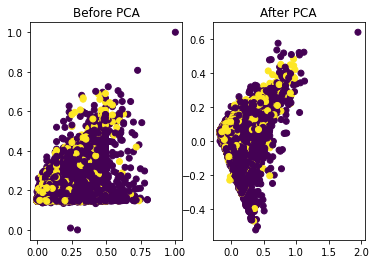

In [192]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(scaled_X["Amount_Credit"], scaled_X["Bill_State_Sep_2005"], c=Y)
axes[0].set_title('Before PCA')
axes[1].scatter(pcs_t[:,0], pcs_t[:,1], c=Y)
axes[1].set_title('After PCA')
plt.show()

Se puede observar como despues de aplicar el PCA, utilizando las dos primeras componentes, aminora su varianza distribuyendose de mejor manera, si se visualizan demasiado juntas es debido a la cantidad de registros en el conjunto de datos.

###**7.2. Importancia de las variables de cada componente**

In [193]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'],
                                index=X.columns
                                )
pcsComponents_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Amount_Credit,0.681,-0.727,-0.077,-0.022,-0.025,-0.015,-0.015,-0.011,-0.004,-0.004,0.005,-0.001,-0.001
Bill_State_Sep_2005,0.334,0.317,-0.194,0.424,-0.229,0.231,-0.204,0.366,0.088,0.311,-0.422,-0.053,-0.058
Bill_State_Aug_2005,0.350,0.343,-0.177,0.329,-0.161,0.106,0.276,-0.225,-0.271,-0.218,0.494,0.102,0.285
Bill_State_Jul_2005,0.196,0.188,-0.021,0.041,-0.012,-0.106,0.105,-0.247,0.534,0.007,0.244,0.014,-0.704
Bill_State_Jun_2005,0.317,0.298,0.028,-0.227,0.155,-0.395,0.138,0.194,0.187,-0.518,-0.297,-0.305,0.191
Bill_State_May_2005,0.313,0.289,0.095,-0.429,0.260,0.074,-0.197,-0.099,-0.128,0.112,-0.130,0.677,-0.001
Bill_State_Apr_2005,0.232,0.212,0.240,-0.332,-0.026,-0.020,-0.232,-0.136,-0.259,0.432,0.237,-0.592,-0.011
Previous_Pay_Sep_2005,0.034,0.004,0.097,0.028,0.092,0.054,0.712,-0.322,-0.245,0.247,-0.473,-0.072,-0.130
Previous_Pay_Aug_2005,0.020,-0.002,0.094,-0.031,0.064,-0.030,0.223,-0.031,0.626,0.443,0.125,0.069,0.571
Previous_Pay_Jul_2005,0.035,-0.001,0.140,-0.095,0.141,-0.017,0.406,0.762,-0.148,0.145,0.337,0.093,-0.198


In [194]:
pcsComponents_df.PC1.abs().idxmax()

'Amount_Credit'

In [195]:
pcsComponents_df.PC2.abs().idxmax()

'Amount_Credit'

Podemos observar como las componentes 1 y 2 tienen mayor peso sobre las variables, aportando la mayor varianza respecto a las demas. Y a su vez, se centra mas sobre la variable Amount_Credit.

---
##**8. Histograma de los atributos**

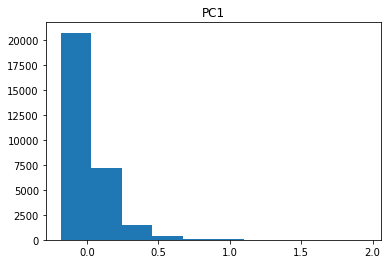

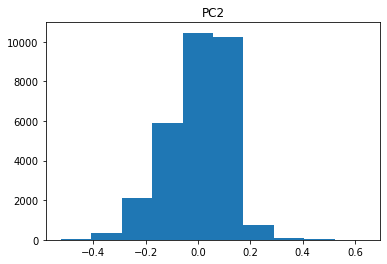

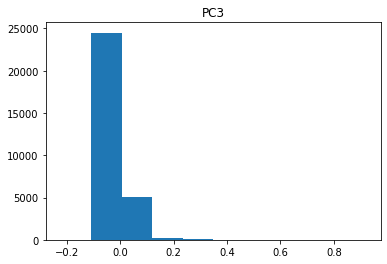

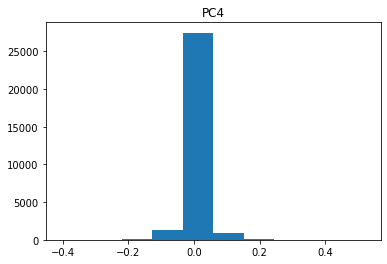

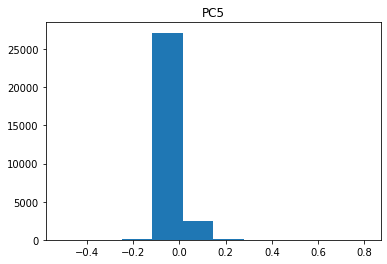

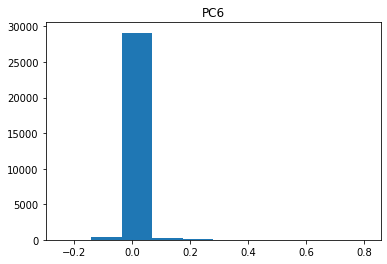

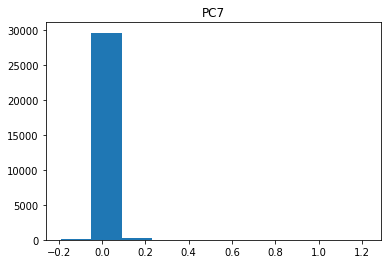

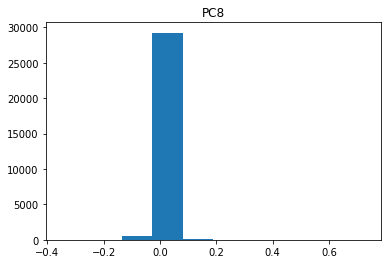

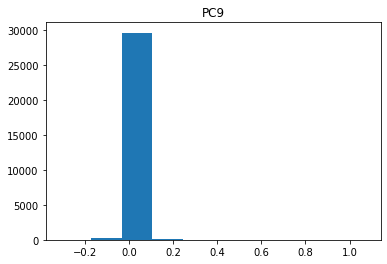

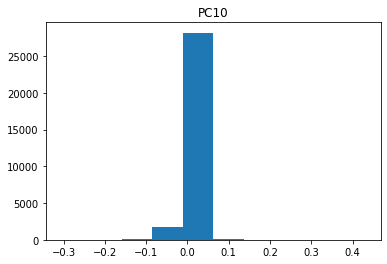

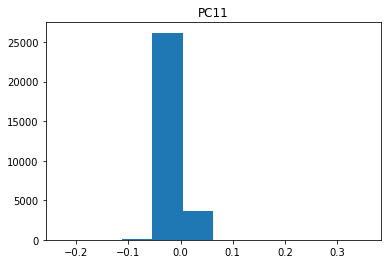

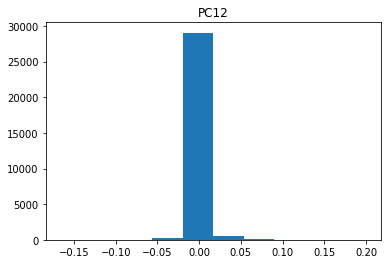

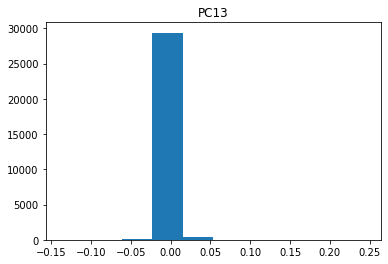

In [196]:
fig, ax = plt.subplots()
for i in range(0,13):
  plt.hist(pcs_t[:,i])
  plt.title("PC%d"%(i+1))
  plt.show()

---
##**9. Visualizacion de los datos usando 3 graficos**

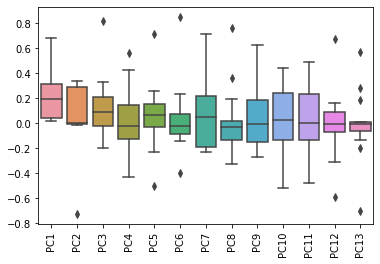

In [197]:
# Diagrama de cajas
plt.xticks(rotation = 'vertical')
g = sns.boxplot(data=pcsComponents_df)

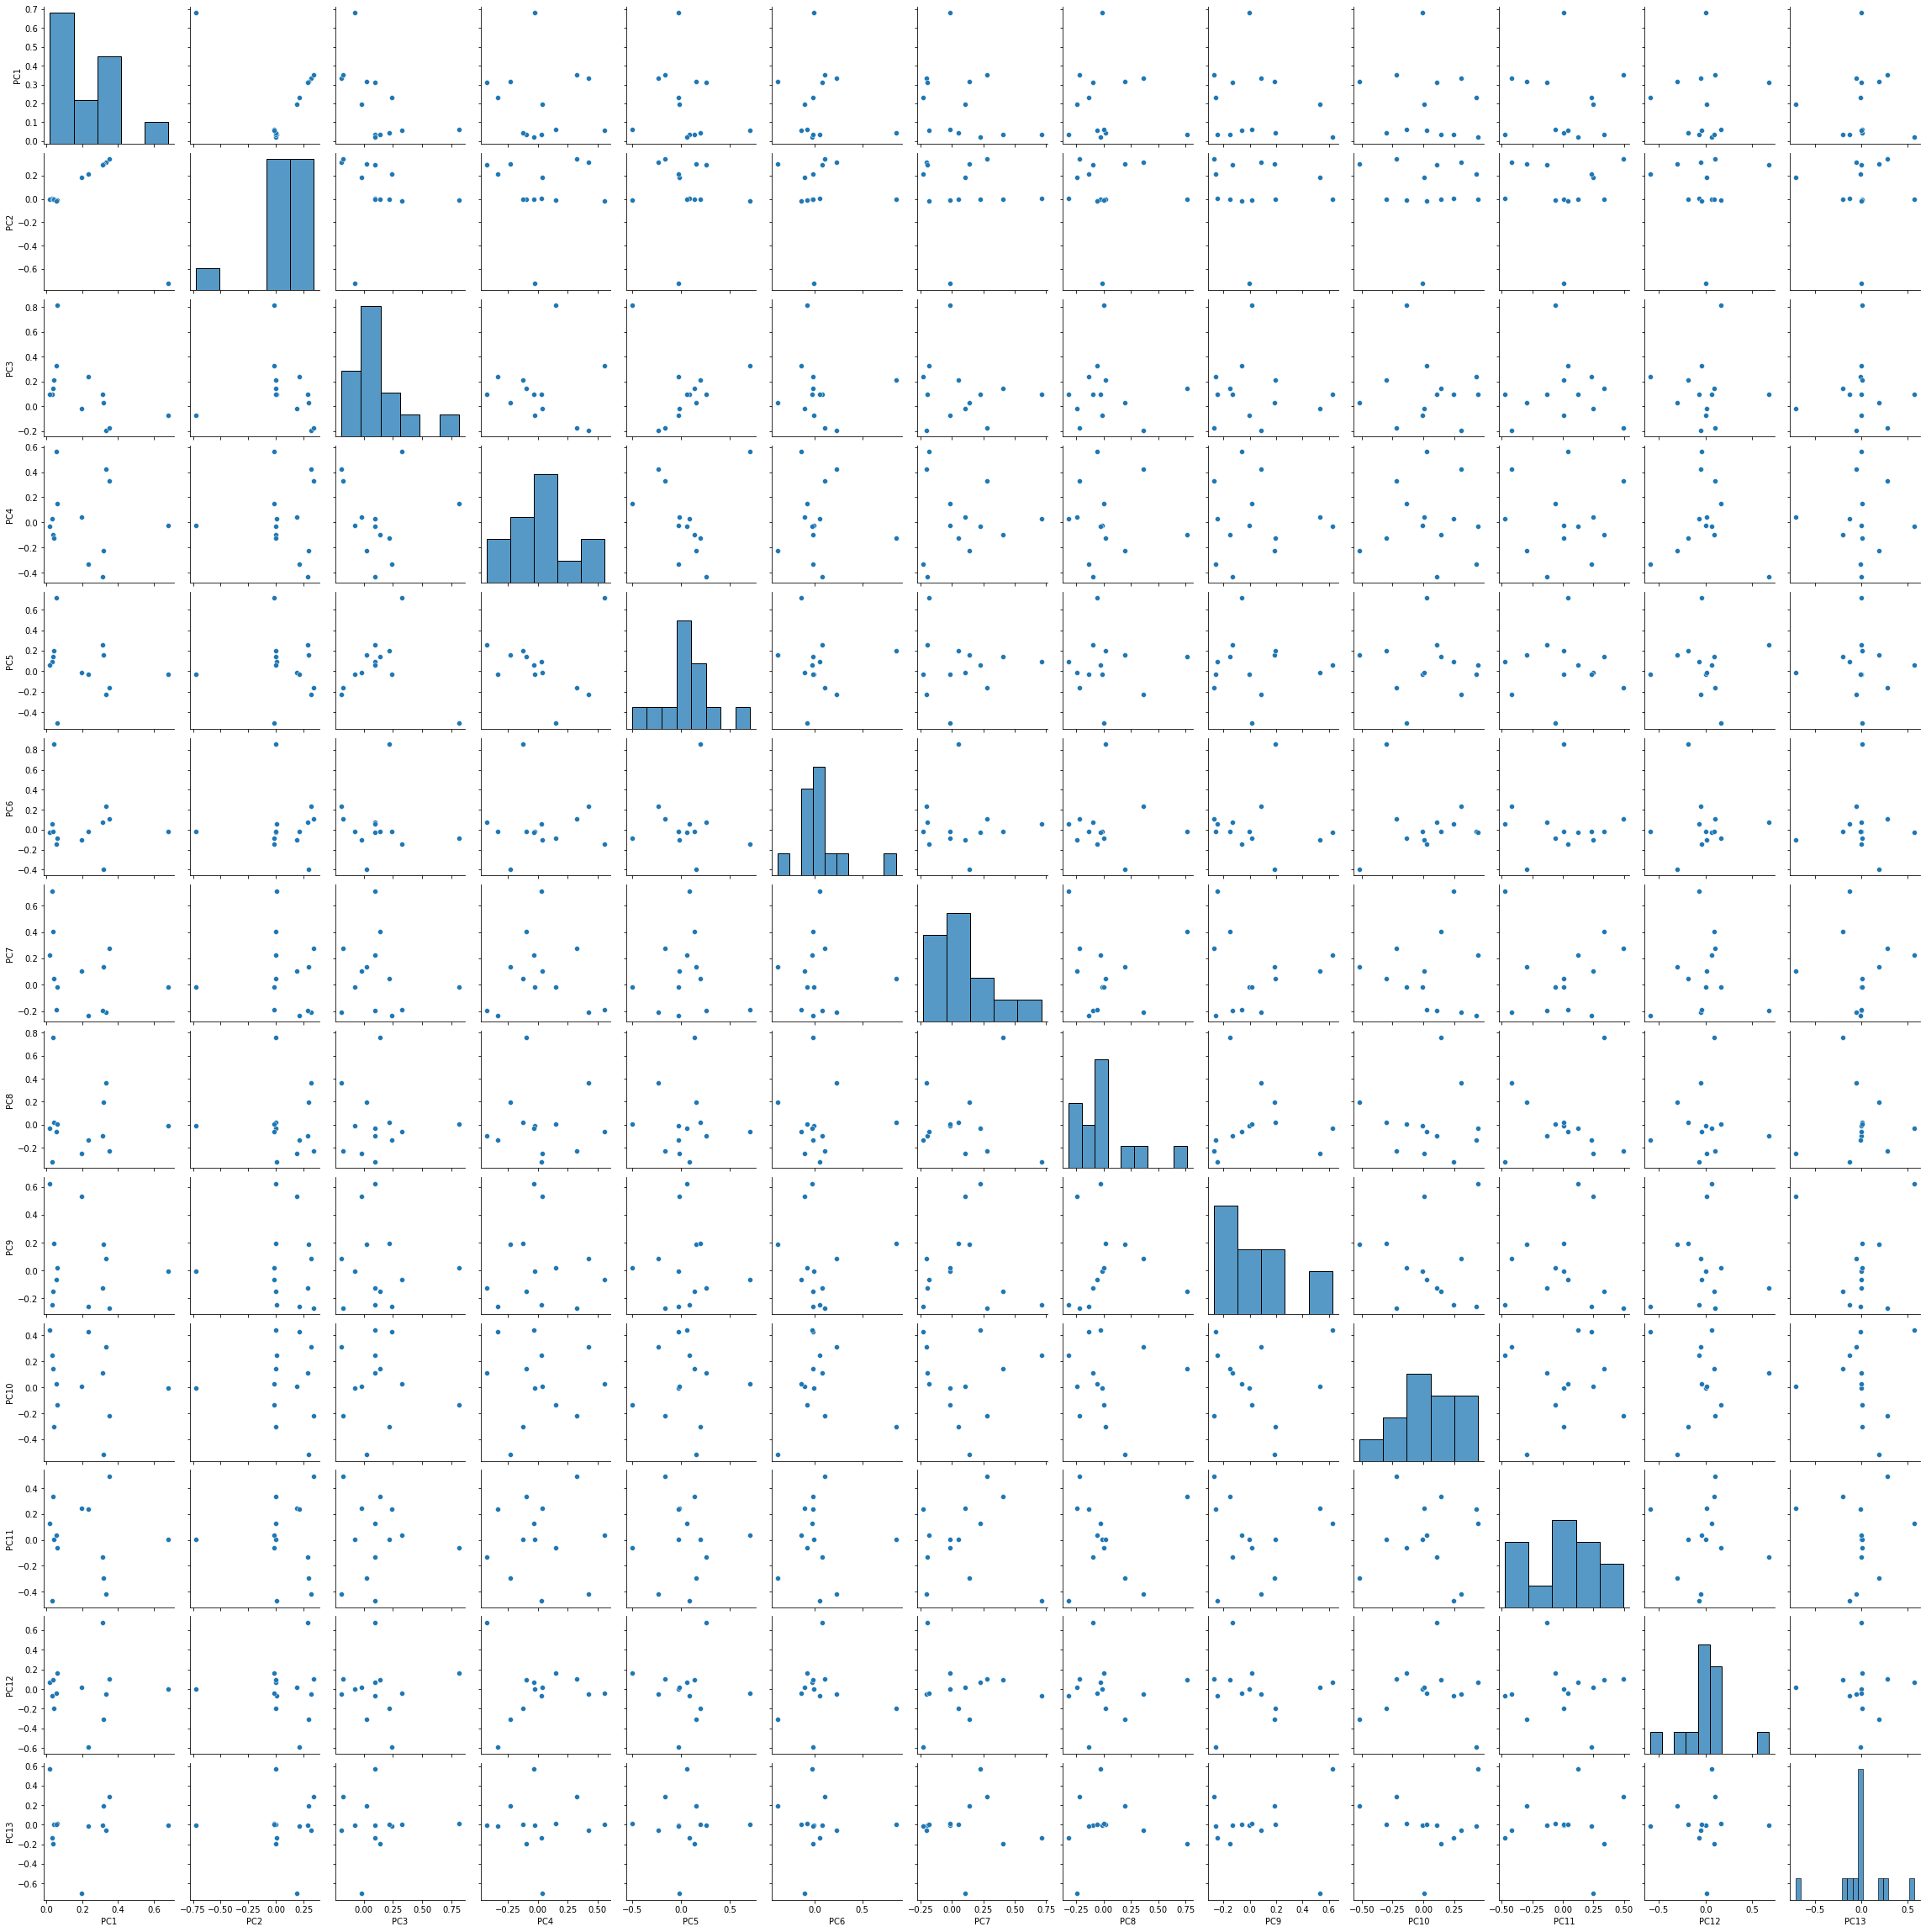

In [198]:
sns.pairplot(pcsComponents_df)

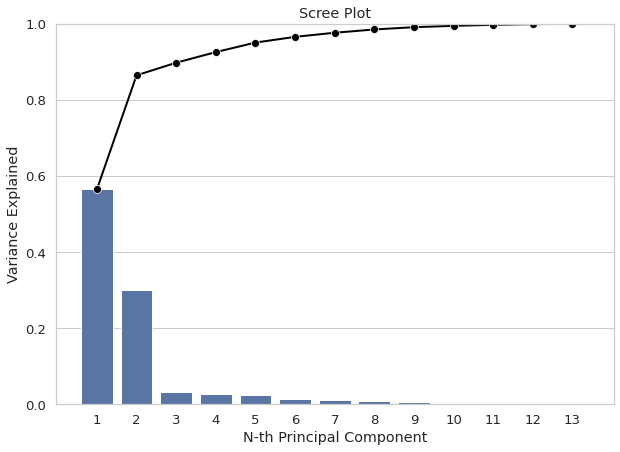

In [199]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )
#### c. Gráfica 3
fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

---
##**10. Interpreta y explica cada uno de los graficos**

**Diagrama Boxplot**

Con este diagrama se puede apreciar la distribucion de los datos en cada columna. 

Lo que se busca aqui es mostrar principalmente sus cuartiles, la simetria de los datos, el sesgo que tienen los datos, media, mediana, etc.

Especificamente en este diagrama se observa la distribucion de los datos en las componentes principales y se indaga como todas las componentes tienen datos atipicos menos la primer componente a pesar de que esta es la que tiene la mayor varianza en los datos.

**Diagrama Pairplot**

Con este grafico podemos observar el comportamiento que presentan las componentes. Se puede visualizar como se correlacionan entre si para asi determinar de algun modo una relacion lineal o de algun otro tipo entre ellas.

**Diagrama Scree Plot**

Este tipo de diagrama nos da una explicacion de la varianza que absorbe cada una de las componentes. Se observa como la primer y segunda componente se llevan la mayor parte de la varianza de los datos.